In [43]:
import pandas as pd
import re

# Data Loading
data = pd.read_csv('/content/spam.csv')

stop_words = ['a', 'an', 'the', 'and', 'is', 'in', 'at', 'but', 'was', 'for', 'were', 'be', 'being', 'been']

def clean_text(msg):
    msg = msg.lower()
    msg = re.sub(r'\d+', '', msg)
    msg = re.sub(r'\s+', ' ', msg)
    msg = re.sub(r'[^\w\s]', '', msg)
    words = msg.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Data Cleaning

data['Message'] = data['Message'].apply(clean_text)
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})

print(data.head())


   Category                                            Message
0         0  go until jurong point crazy available only bug...
1         0                            ok lar joking wif u oni
2         1  free entry wkly comp to win fa cup final tkts ...
3         0        u dun say so early hor u c already then say
4         0  nah i dont think he goes to usf he lives aroun...


In [44]:
# Converting text into numerical format using Bag-of-Words (BoW) and TF-IDF (Term Frequency-Inverse Document Frequency)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# BOW

bow_vectorizer = CountVectorizer()

bow_matrix = bow_vectorizer.fit_transform(data['Message'])

bow_features = bow_vectorizer.get_feature_names_out()

bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_features)

# TF-IDF

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(data['Message'])

tfidf_features = tfidf_vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_features)


In [45]:
metrics = {
}

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = bow_matrix
# X = tfidf_matrix

y = data['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
# Naive Bayes with Laplace Smoothing
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes model with Laplace Smoothing (aplha = 1.0)

nb_model = MultinomialNB(alpha=1.0)

nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

acc = accuracy_score(y_test, y_pred) * 100
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

metrics['Naive Bayes'] = {
    'Accuracy': acc,
    'Precision': report.split()[13],
    'Recall': report.split()[16],
    'F1-Score': report.split()[10],
    'Confusion Matrix': conf_matrix
}


Accuracy: 97.42822966507177

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1448
           1       0.87      0.95      0.91       224

    accuracy                           0.97      1672
   macro avg       0.93      0.96      0.95      1672
weighted avg       0.98      0.97      0.97      1672


Confusion Matrix:
 [[1417   31]
 [  12  212]]


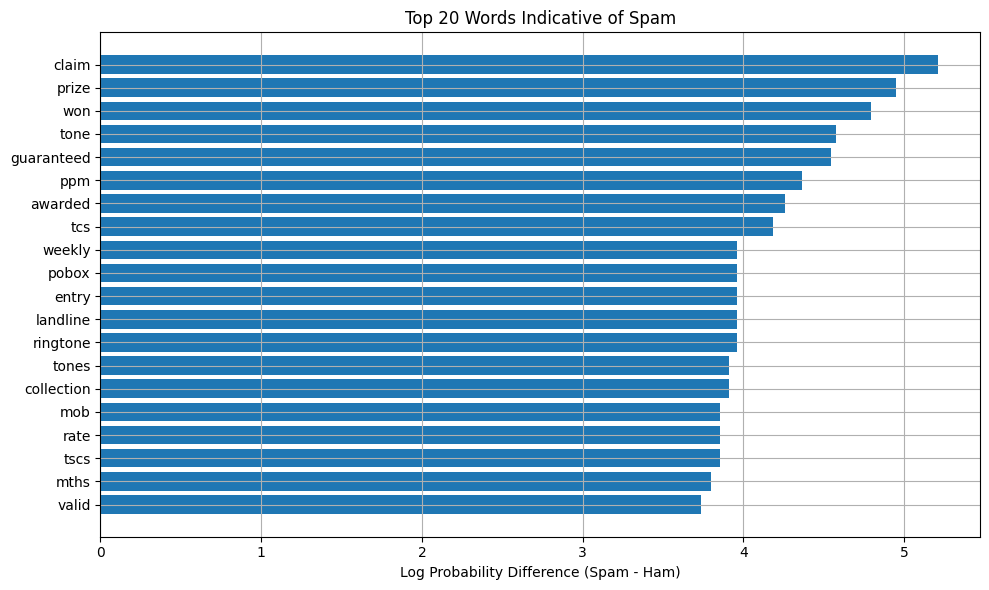

In [49]:
import numpy as np
import matplotlib.pyplot as plt

feature_names = bow_vectorizer.get_feature_names_out()

spam_log_probs = nb_model.feature_log_prob_[1]
ham_log_probs = nb_model.feature_log_prob_[0]

log_prob_diff = spam_log_probs - ham_log_probs

top_spam_indices = np.argsort(log_prob_diff)[-20:]
top_spam_words = feature_names[top_spam_indices]
top_spam_scores = log_prob_diff[top_spam_indices]

plt.figure(figsize=(10,6))
plt.barh(top_spam_words, top_spam_scores)
plt.xlabel('Log Probability Difference (Spam - Ham)')
plt.title('Top 20 Words Indicative of Spam')
plt.grid(True)
plt.tight_layout()
plt.show()

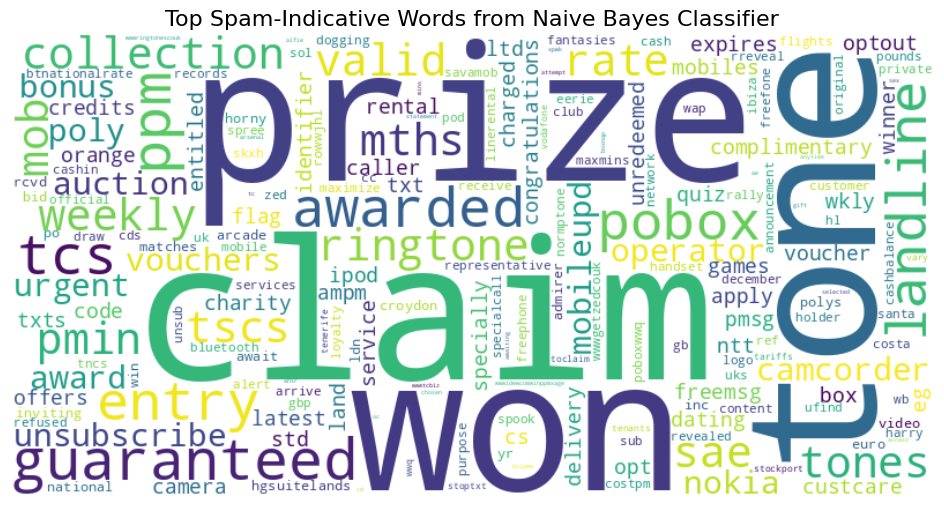

In [50]:
from wordcloud import WordCloud

feature_names = bow_vectorizer.get_feature_names_out()

spam_log_probs = nb_model.feature_log_prob_[1]
ham_log_probs = nb_model.feature_log_prob_[0]

log_prob_diff = spam_log_probs - ham_log_probs

spam_influence = {
    word: score
    for word, score in zip(feature_names, log_prob_diff)
    if score > 0
}

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(spam_influence)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Spam-Indicative Words from Naive Bayes Classifier", fontsize=16)
plt.show()


In [51]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

acc = accuracy_score(y_test, y_pred) * 100
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

metrics['Logistic Regression'] = {
    'Accuracy': acc,
    'Precision': report.split()[13],
    'Recall': report.split()[16],
    'F1-Score': report.split()[10],
    'Confusion Matrix': conf_matrix
}

Accuracy: 97.42822966507177

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1448
           1       0.87      0.95      0.91       224

    accuracy                           0.97      1672
   macro avg       0.93      0.96      0.95      1672
weighted avg       0.98      0.97      0.97      1672


Confusion Matrix:
 [[1417   31]
 [  12  212]]


In [52]:
# Support Vector Machine

from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

acc = accuracy_score(y_test, y_pred) * 100
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

metrics['SVM'] = {
    'Accuracy': acc,
    'Precision': report.split()[13],
    'Recall': report.split()[16],
    'F1-Score': report.split()[10],
    'Confusion Matrix': conf_matrix
}

Accuracy: 97.42822966507177

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1448
           1       0.87      0.95      0.91       224

    accuracy                           0.97      1672
   macro avg       0.93      0.96      0.95      1672
weighted avg       0.98      0.97      0.97      1672


Confusion Matrix:
 [[1417   31]
 [  12  212]]


In [53]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

acc = accuracy_score(y_test, y_pred) * 100
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

metrics['Random Forest'] = {
    'Accuracy': acc,
    'Precision': report.split()[13],
    'Recall': report.split()[16],
    'F1-Score': report.split()[10],
    'Confusion Matrix': conf_matrix
}

Accuracy: 97.42822966507177

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1448
           1       0.87      0.95      0.91       224

    accuracy                           0.97      1672
   macro avg       0.93      0.96      0.95      1672
weighted avg       0.98      0.97      0.97      1672


Confusion Matrix:
 [[1417   31]
 [  12  212]]


In [54]:
# Gradient Boosting using scikit-learn

from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train.toarray(), y_train)
gb_pred = gb_model.predict(X_test.toarray())

acc = accuracy_score(y_test, y_pred) * 100
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

metrics['Gradient Boosting using scikit-learn'] = {
    'Accuracy': acc,
    'Precision': report.split()[13],
    'Recall': report.split()[16],
    'F1-Score': report.split()[10],
    'Confusion Matrix': conf_matrix
}

Accuracy: 97.42822966507177

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1448
           1       0.87      0.95      0.91       224

    accuracy                           0.97      1672
   macro avg       0.93      0.96      0.95      1672
weighted avg       0.98      0.97      0.97      1672


Confusion Matrix:
 [[1417   31]
 [  12  212]]


In [55]:
# Gradient Boosting using XGBoost

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

acc = accuracy_score(y_test, y_pred) * 100
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

metrics['Gradient Boosting using XGBoost'] = {
    'Accuracy': acc,
    'Precision': report.split()[13],
    'Recall': report.split()[16],
    'F1-Score': report.split()[10],
    'Confusion Matrix': conf_matrix
}


Accuracy: 97.42822966507177

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1448
           1       0.87      0.95      0.91       224

    accuracy                           0.97      1672
   macro avg       0.93      0.96      0.95      1672
weighted avg       0.98      0.97      0.97      1672


Confusion Matrix:
 [[1417   31]
 [  12  212]]


In [56]:
print(metrics)

{'Naive Bayes': {'Accuracy': 97.42822966507177, 'Precision': '224', 'Recall': '1672', 'F1-Score': '0.87', 'Confusion Matrix': array([[1417,   31],
       [  12,  212]])}, 'Logistic Regression': {'Accuracy': 97.42822966507177, 'Precision': '224', 'Recall': '1672', 'F1-Score': '0.87', 'Confusion Matrix': array([[1417,   31],
       [  12,  212]])}, 'SVM': {'Accuracy': 97.42822966507177, 'Precision': '224', 'Recall': '1672', 'F1-Score': '0.87', 'Confusion Matrix': array([[1417,   31],
       [  12,  212]])}, 'Random Forest': {'Accuracy': 97.42822966507177, 'Precision': '224', 'Recall': '1672', 'F1-Score': '0.87', 'Confusion Matrix': array([[1417,   31],
       [  12,  212]])}, 'Gradient Boosting using scikit-learn': {'Accuracy': 97.42822966507177, 'Precision': '224', 'Recall': '1672', 'F1-Score': '0.87', 'Confusion Matrix': array([[1417,   31],
       [  12,  212]])}, 'Gradient Boosting using XGBoost': {'Accuracy': 97.42822966507177, 'Precision': '224', 'Recall': '1672', 'F1-Score': '0.87

In [58]:
models = {
    'Naive Bayes': nb_model,
    'Logistic Regression': lr_model,
    'SVM': svm_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'XGBoost': xgb_model
}


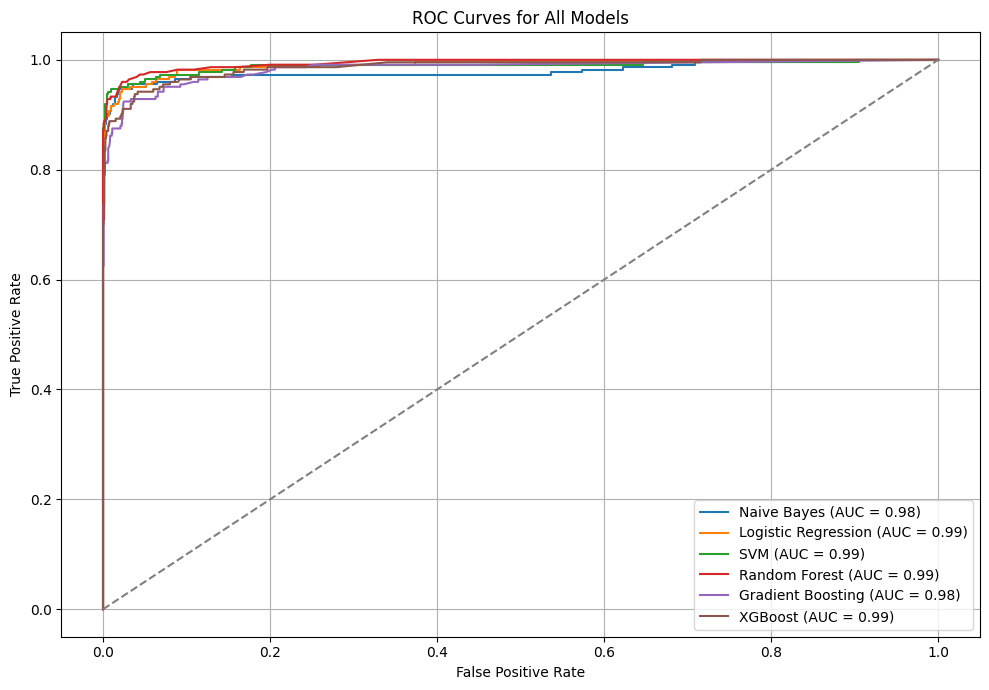

In [59]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 7))

for name, model in models.items():

    # Some models like SVM (LinearSVC) do not support predict_proba
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:

        try:
            y_probs = model.decision_function(X_test)
        except AttributeError:
            print(f"Model {name} does not support probability or decision scores.")
            continue

    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    if name not in metrics:
        metrics[name] = {}
    metrics[name]['AUC'] = roc_auc

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [60]:
# Feature Importance: Words Indicative of Spam

feature_names = bow_vectorizer.get_feature_names_out()

spam_log_probs = nb_model.feature_log_prob_[1]
ham_log_probs = nb_model.feature_log_prob_[0]

log_prob_diff = spam_log_probs - ham_log_probs

importance_df = pd.DataFrame({
    'word': feature_names,
    'spam_score': log_prob_diff
}).sort_values(by='spam_score', ascending=False)

print(importance_df.head(20))


            word  spam_score
1285       claim    5.211117
5707       prize    4.951606
8307         won    4.791263
7567        tone    4.573540
3005  guaranteed    4.546141
5616         ppm    4.363819
509      awarded    4.258459
7270         tcs    4.181498
3951    landline    3.958354
5523       pobox    3.958354
6140    ringtone    3.958354
8141      weekly    3.958354
2232       entry    3.958354
7568       tones    3.907061
1364  collection    3.907061
4599         mob    3.852994
5890        rate    3.852994
7690        tscs    3.852994
4716        mths    3.795835
5513        pmin    3.735211


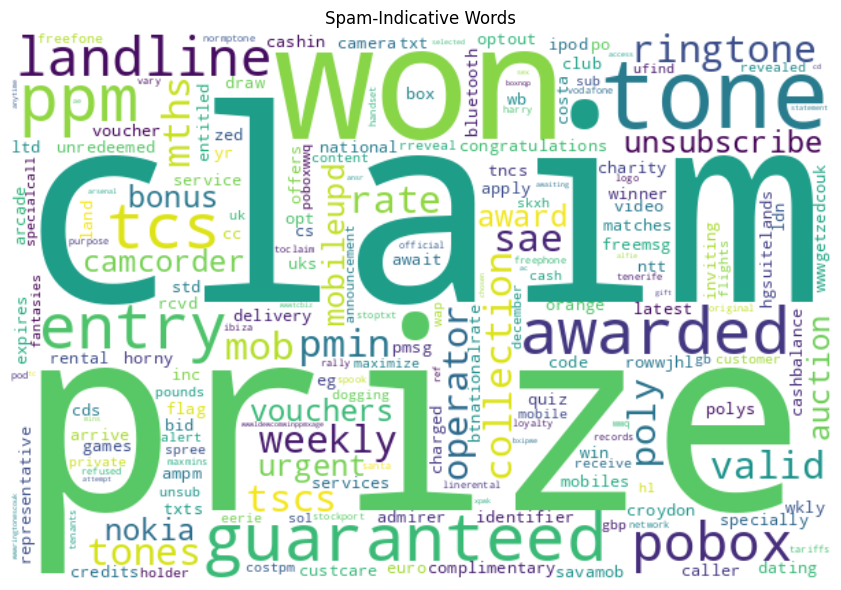

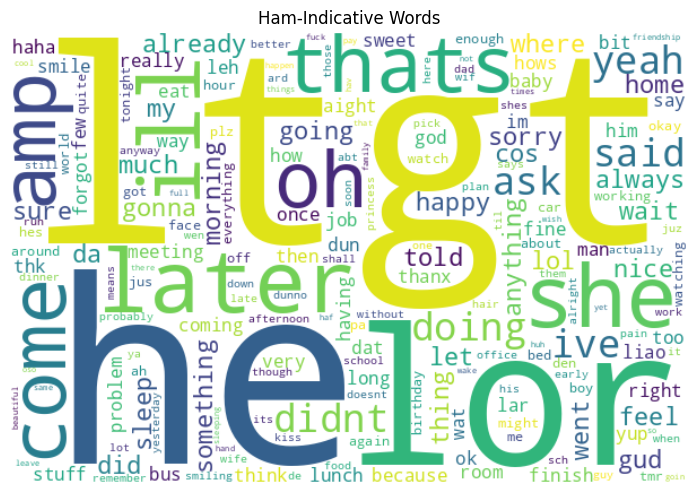

In [61]:
# Word Clouds for Spam vs. Ham

spam_words = {word: score for word, score in zip(feature_names, log_prob_diff) if score > 0}
spam_wc = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(spam_words)

ham_words = {word: -score for word, score in zip(feature_names, log_prob_diff) if score < 0}
ham_wc = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(ham_words)

plt.figure(figsize=(14, 6))

plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Spam-Indicative Words')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Ham-Indicative Words')

plt.tight_layout()
plt.show()


In [62]:
# Find the model with the highest accuracy
best_model_name = max(metrics, key=lambda k: metrics[k].get('Accuracy', 0))
print(f"Best model based on Accuracy: {best_model_name}")

Best model based on Accuracy: Naive Bayes


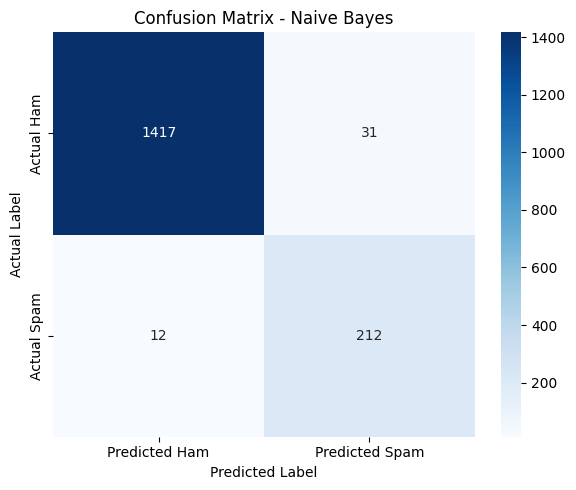

In [63]:
import seaborn as sns

conf_matrix = metrics[best_model_name]['Confusion Matrix']

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Ham', 'Predicted Spam'],
            yticklabels=['Actual Ham', 'Actual Spam'])
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()


In [64]:
metrics_without_inbulid = {}

In [66]:
# Naive Bayes without using inbuilt functions


def train_naive_bayes(X, y):
    n_docs, n_words = X.shape
    classes = np.unique(y)
    priors = {}
    likelihoods = {}

    for c in classes:
        X_c = X[y == c]
        priors[c] = X_c.shape[0] / n_docs
        word_counts = X_c.sum(axis=0).A1 + 1  # Laplace smoothing
        likelihoods[c] = word_counts / word_counts.sum()

    return priors, likelihoods

def predict_naive_bayes(X, priors, likelihoods):
    predictions = []
    for x in X:
        scores = {}
        x = x.toarray().flatten()
        for c in priors:
            log_prob = np.log(priors[c]) + np.sum(x * np.log(likelihoods[c]))
            scores[c] = log_prob
        predictions.append(max(scores, key=scores.get))
    return np.array(predictions)

y_train_arr = np.array(y_train)
y_test_arr = np.array(y_test)
priors, likelihoods = train_naive_bayes(X_train, y_train_arr)
y_pred = predict_naive_bayes(X_test, priors, likelihoods)

acc = accuracy_score(y_test_arr, y_pred) * 100
report = classification_report(y_test_arr, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test_arr, y_pred)

print("Accuracy:", acc)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

metrics_without_inbulid['Naive Bayes (Scratch)'] = {
    'Accuracy': acc,
    'Precision': report['1']['precision'],
    'Recall': report['1']['recall'],
    'F1-Score': report['1']['f1-score'],
    'Confusion Matrix': conf_matrix
}


Accuracy: 97.42822966507177

Classification Report:
 {'0': {'precision': 0.9916025192442267, 'recall': 0.9785911602209945, 'f1-score': 0.9850538755648245, 'support': 1448.0}, '1': {'precision': 0.8724279835390947, 'recall': 0.9464285714285714, 'f1-score': 0.9079229122055674, 'support': 224.0}, 'accuracy': 0.9742822966507177, 'macro avg': {'precision': 0.9320152513916606, 'recall': 0.9625098658247829, 'f1-score': 0.946488393885196, 'support': 1672.0}, 'weighted avg': {'precision': 0.975636552738276, 'recall': 0.9742822966507177, 'f1-score': 0.9747205407607136, 'support': 1672.0}}

Confusion Matrix:
 [[1417   31]
 [  12  212]]


In [67]:
# Logistic Regression

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def train_logistic(X, y, lr=0.01, epochs=1000):
    n, d = X.shape
    w = np.zeros(d)
    for _ in range(epochs):
        z = X @ w
        h = sigmoid(z)
        gradient = X.T @ (h - y) / n
        w -= lr * gradient
    return w

def predict_logistic(X, w, threshold=0.5):
    probs = sigmoid(X @ w)
    return (probs >= threshold).astype(int)

w = train_logistic(X_train, y_train)
y_pred = predict_logistic(X_test, w)

acc = accuracy_score(y_test, y_pred) * 100
report = classification_report(y_test_arr, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test_arr, y_pred)

print("Accuracy:", acc)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

metrics_without_inbulid['Logistic Regression (Scratch)'] = {
    'Accuracy': acc,
    'Precision': report['1']['precision'],
    'Recall': report['1']['recall'],
    'F1-Score': report['1']['f1-score'],
    'Confusion Matrix': conf_matrix
}

Accuracy: 90.311004784689

Classification Report:
 {'0': {'precision': 0.9095541401273886, 'recall': 0.9861878453038674, 'f1-score': 0.9463220675944334, 'support': 1448.0}, '1': {'precision': 0.803921568627451, 'recall': 0.36607142857142855, 'f1-score': 0.5030674846625767, 'support': 224.0}, 'accuracy': 0.90311004784689, 'macro avg': {'precision': 0.8567378543774198, 'recall': 0.6761296369376479, 'f1-score': 0.724694776128505, 'support': 1672.0}, 'weighted avg': {'precision': 0.8954024080604113, 'recall': 0.90311004784689, 'f1-score': 0.8869386784935148, 'support': 1672.0}}

Confusion Matrix:
 [[1428   20]
 [ 142   82]]


In [68]:
# Linear SVM

def train_svm(X, y, lr=0.01, C=1.0, epochs=1000):
    n, d = X.shape
    w = np.zeros(d)
    y = np.where(y == 1, 1, -1)  # Ensure labels are +1/-1

    for _ in range(epochs):
        margin = y * (X @ w)
        indicator = margin < 1
        grad = w - C * ((X.T @ (indicator * y)) / n)
        w -= lr * grad
    return w

def predict_svm(X, w):
    return (X @ w >= 0).astype(int)

w = train_svm(X_train, y_train)
y_pred = predict_svm(X_test, w)

acc = accuracy_score(y_test, y_pred) * 100
report = classification_report(y_test_arr, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test_arr, y_pred)

print("Accuracy:", acc)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

metrics_without_inbulid['Linear SVM (Scratch)'] = {
    'Accuracy': acc,
    'Precision': report['1']['precision'],
    'Recall': report['1']['recall'],
    'F1-Score': report['1']['f1-score'],
    'Confusion Matrix': conf_matrix
}

Accuracy: 87.32057416267942

Classification Report:
 {'0': {'precision': 0.8772893772893773, 'recall': 0.9924033149171271, 'f1-score': 0.931302657161374, 'support': 1448.0}, '1': {'precision': 0.6764705882352942, 'recall': 0.10267857142857142, 'f1-score': 0.17829457364341086, 'support': 224.0}, 'accuracy': 0.8732057416267942, 'macro avg': {'precision': 0.7768799827623357, 'recall': 0.5475409431728493, 'f1-score': 0.5547986154023924, 'support': 1672.0}, 'weighted avg': {'precision': 0.8503854246888303, 'recall': 0.8732057416267942, 'f1-score': 0.8304211914269101, 'support': 1672.0}}

Confusion Matrix:
 [[1437   11]
 [ 201   23]]


In [70]:
# Find the model with the highest accuracy
best_model_name = max(metrics_without_inbulid, key=lambda k: metrics_without_inbulid[k].get('Accuracy', 0))
print(f"Best model based on Accuracy: {best_model_name}")

Best model based on Accuracy: Naive Bayes (Scratch)


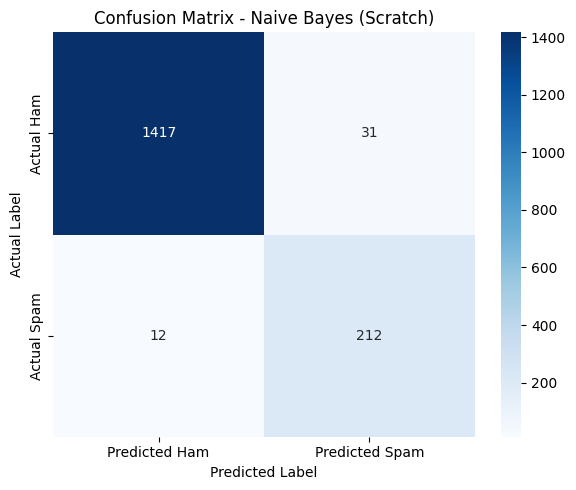

In [71]:
conf_matrix = metrics_without_inbulid[best_model_name]['Confusion Matrix']

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Ham', 'Predicted Spam'],
            yticklabels=['Actual Ham', 'Actual Spam'])
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()